# **CUSTOMER CHURN ANALYSIS** 

### **INTRODUCTION:**

Customer churn refers to the loss of existing customers, which can significantly impact a business’s profitability. Since acquiring new customers is often more challenging and costly than retaining existing ones, analyzing churn is crucial for developing effective customer retention strategies.

This exploratory data analysis (EDA) project focuses on understanding and analysing the factors influencing customer churn in a telecommunication company. By examining churn rates across different customer demographics, service subscriptions, and account details, we can uncover key patterns that contribute to customer churn. These insights help in implementing targeted retention strategies such as personalized discounts, optimized service plans, and improved customer support. Furthermore, addressing the underlying reasons for churn can help businesses to enhance customer satisfaction. Offering better service bundles, flexible contracts, and proactive customer support can strengthen customer relationships and enhance long-term retention. 

##### **ABOUT THE DATASET:**

The dataset used for this analysis is a sample from a telecommunication company. It contains multiple records, each representing a customer, and several columns, each representing different attributes related to demographics, service subscriptions, account details, and churn status.

Below are the details of the dataset attributes:

**customerID** - unique identifier for each customer

**Gender** - Customer's gender (male or female)

**SeniorCitizen** - whether senior citizen or not(1 or 0)

**Partner** - Whether the customer has a partner (Yes or No)

**Dependants** - Whether the customer has dependants(Yes or No)

**tenure** - No. of months the customer has stayed

**PhoneService** - Whether using a phone service 

**MultipleLines** - Whether using multiple lines of phone service (Yes, No, No phone service)

**InternetService** - Internet service type (DSL, Fiber optic, No)

**OnlineSecurity** - Whether using online security service( Yes, No, No internet service)

**OnlineBackup** - Whether using online bsckup service( Yes, No, No internet service)

**DeviceProtection** - Whether using online device protection service( Yes, No, No internet service)

**TechSupport** - Whether using tech support service( Yes, No, No internet service)

**StreamingTV** - Whether using streaming TV service( Yes, No, No internet service)

**StreamingMovies** - Whether using streaming movies service( Yes, No, No internet service)

**Contract** - contract type (Month-to-month, One year, Two year)

**PaperlessBilling** - Whether opted for paperless billing (Yes, No)

**PaymentMethod** - Payment method used (Electronic check, Mailed check, Bank transfer, Credit card)

**MonthlyCharges** - Monthly amount charged to the customer

**TotalCharges** - Total amount charged

**Churn** - Whether the customer has churned (Yes, No)



##### IMPORTING THE LIBRARIES:

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)   # to ignore future warnings

##### **LOADING THE DATASET:**

In [2]:
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##### **EXPLORING AND CLEANING THE DATA:**

In [3]:
df.shape  # gives no. of rows and columns

(7043, 21)

In [4]:
#Checking for null values:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Checking for duplicate records:
df.duplicated().sum()

0

In [6]:
df.info() # gives information about null vlaues and data type of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges column has object data type, which has to be converted into float. So we can check for any non-numerical values in the column.

In [7]:
# Filtering out rows with non-numerical values in 'TotalCharges' column:

non_numeric_rows= df[pd.to_numeric(df['TotalCharges'],errors='coerce').isna()]
non_numeric_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


The above result shows that there are 11 rows where the 'TotalCharges' column has blank values. It is also noticable that all these are records where the tenure=0. i.e., These must be the records of the customers who churned out even before completing a month of service. However, the monthly charges for these records are not zero. So some charges must have been incurred form these customers (can be a month fee of a one-time installation fee) and the total charges in these case will be same as the monthly charges incurred.

So, we can replace the blank values in the 'TotalCharges' column by the corresponding 'MonthlyCharges' vlaues.

In [8]:
# Replacing the blank values in TotalCharges column:

df.loc[df['TotalCharges']==" ", 'TotalCharges']=  df.loc[df['TotalCharges']==" ", 'MonthlyCharges']


Now all the non-numeric values in the column are overcome and can now be converted into float data type.

In [9]:
# Converting TotalCharges into float data type:
df['TotalCharges'] = df['TotalCharges'].astype('float')

There are several columns in the dataset with object data type, most of which have very few unique values. Converting these to category data type can save a lot of memory.

In [10]:
# Calculating memory usage before data type conversions:

initial_memory= df.memory_usage().sum()/1024**2
print("memory usage: ",initial_memory,"MB")

memory usage:  1.1285324096679688 MB


In [11]:
# Printing the number of unique values corresponding to each column:

print("Here are the columns with their corresponding number of unique values:")
for i in df.columns:
    print(i," : ",df[i].nunique())    

Here are the columns with their corresponding number of unique values:
customerID  :  7043
gender  :  2
SeniorCitizen  :  2
Partner  :  2
Dependents  :  2
tenure  :  73
PhoneService  :  2
MultipleLines  :  3
InternetService  :  3
OnlineSecurity  :  3
OnlineBackup  :  3
DeviceProtection  :  3
TechSupport  :  3
StreamingTV  :  3
StreamingMovies  :  3
Contract  :  3
PaperlessBilling  :  2
PaymentMethod  :  4
MonthlyCharges  :  1585
TotalCharges  :  6534
Churn  :  2


In [12]:
# Converting columns with less than 5 unique values into category data type

for i in df.columns:
    if df[i].nunique() <5:
        df[i]=df[i].astype('category')

In [13]:
df.dtypes  # checking data types

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

Now all the data type conversions are done.

In [14]:
# Calculating memory usage after data type conversions:

final_memory= df.memory_usage().sum()/1024**2
print("memory usage: ",final_memory,"MB")

memory usage:  0.33139705657958984 MB


In [15]:
print("memory saved =", initial_memory -final_memory, "MB")

memory saved = 0.7971353530883789 MB


In [16]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## EXPLORATORY ANALYSIS:

In [17]:
sns.set_style('whitegrid')  # setting theme for all plots

### Distribution of Churn  

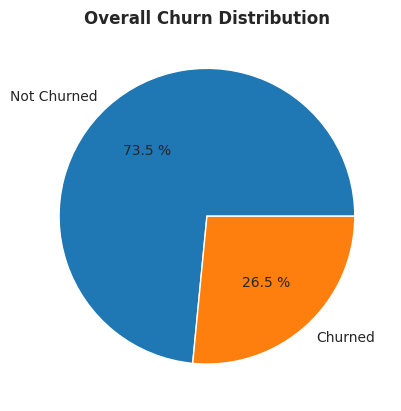

In [18]:
# Creating a pie chart for overall churn distribution:

churncounts=df['Churn'].value_counts()
plt.pie(churncounts, autopct='%1.1f %%',labels= ['Not Churned','Churned'])
plt.title("Overall Churn Distribution",fontweight='bold')
plt.show()

### Churn by Services:

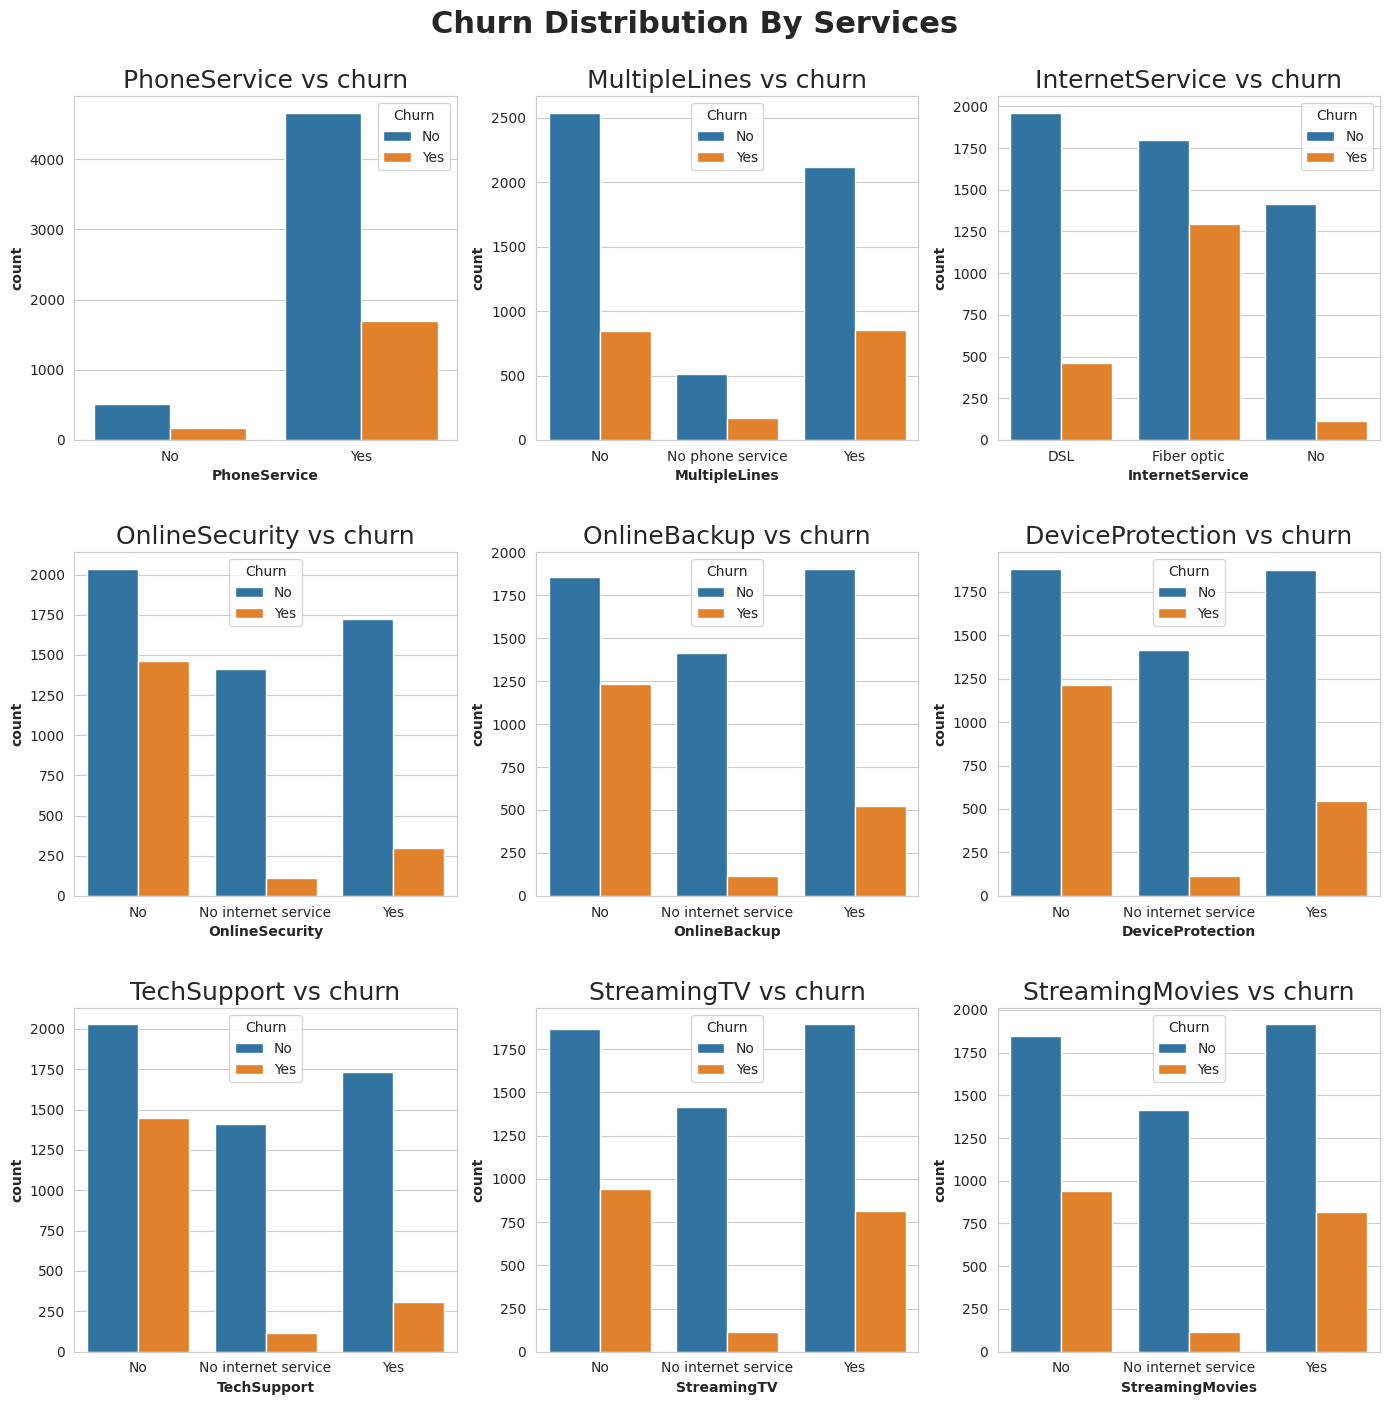

In [19]:
# Creating subplots for the distribution or churn by each service: 

fig,axes= plt.subplots(3,3, figsize=(14,14))
axes= axes.flatten()

service_cols= ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for i, service in enumerate(service_cols):
    sns.countplot(data=df,x=service, hue='Churn',ax=axes[i])
    axes[i].set_title(f"{service} vs churn", fontsize= 18)
    axes[i].set_xlabel(service, fontweight='bold')
    axes[i].set_ylabel("count", fontweight='bold')
   
    
plt.suptitle("Churn Distribution By Services", fontsize=22, fontweight='bold', y=1)
plt.tight_layout(h_pad=3)
plt.show()

**Phone service and Multiple Lines:**
* A small portion of customers do not use phone services, and their churn rate is almost same as  those who do.
* Customers using multiple lines show a slightly higher churn rate compared to those using a single line, which may indicate a preference for simpler, more cost-effective options.

**Internet Service:**
* Customers using fiber optic service exhibit significantly higher churn rates compared to those using DSL. This suggests potential dissatisfaction with fiber optic service or its pricing.
* Notably, a large portion of customers do not use internet service at all, and their churn rate is minimal. These customers might be using the service primarily for phone or TV purposes.

**Online Security and Tech Support:**
* A significant proportion of customers without online security or tech support have churned, while customers who opted for these services have a much lower churn rate.This indicates that security and technical support play a crucial role in customer retention. Offering bundled plans or emphasizing these services might help reduce churn.

**Online Backup and Device Protection:**
* Churn is lower among customers who subscribed to online backup or device protection services compared to those who did not. These services might be helping to enhance customer loyalty.

**Streaming TV and Streaming Movies:**
* Customers who did not subscribe to streaming services have a slightly higher churn rate compared to those who did. This suggests that entertainment services could contribute to higher engagement and customer retention.

### Churn by Customer Account Details:

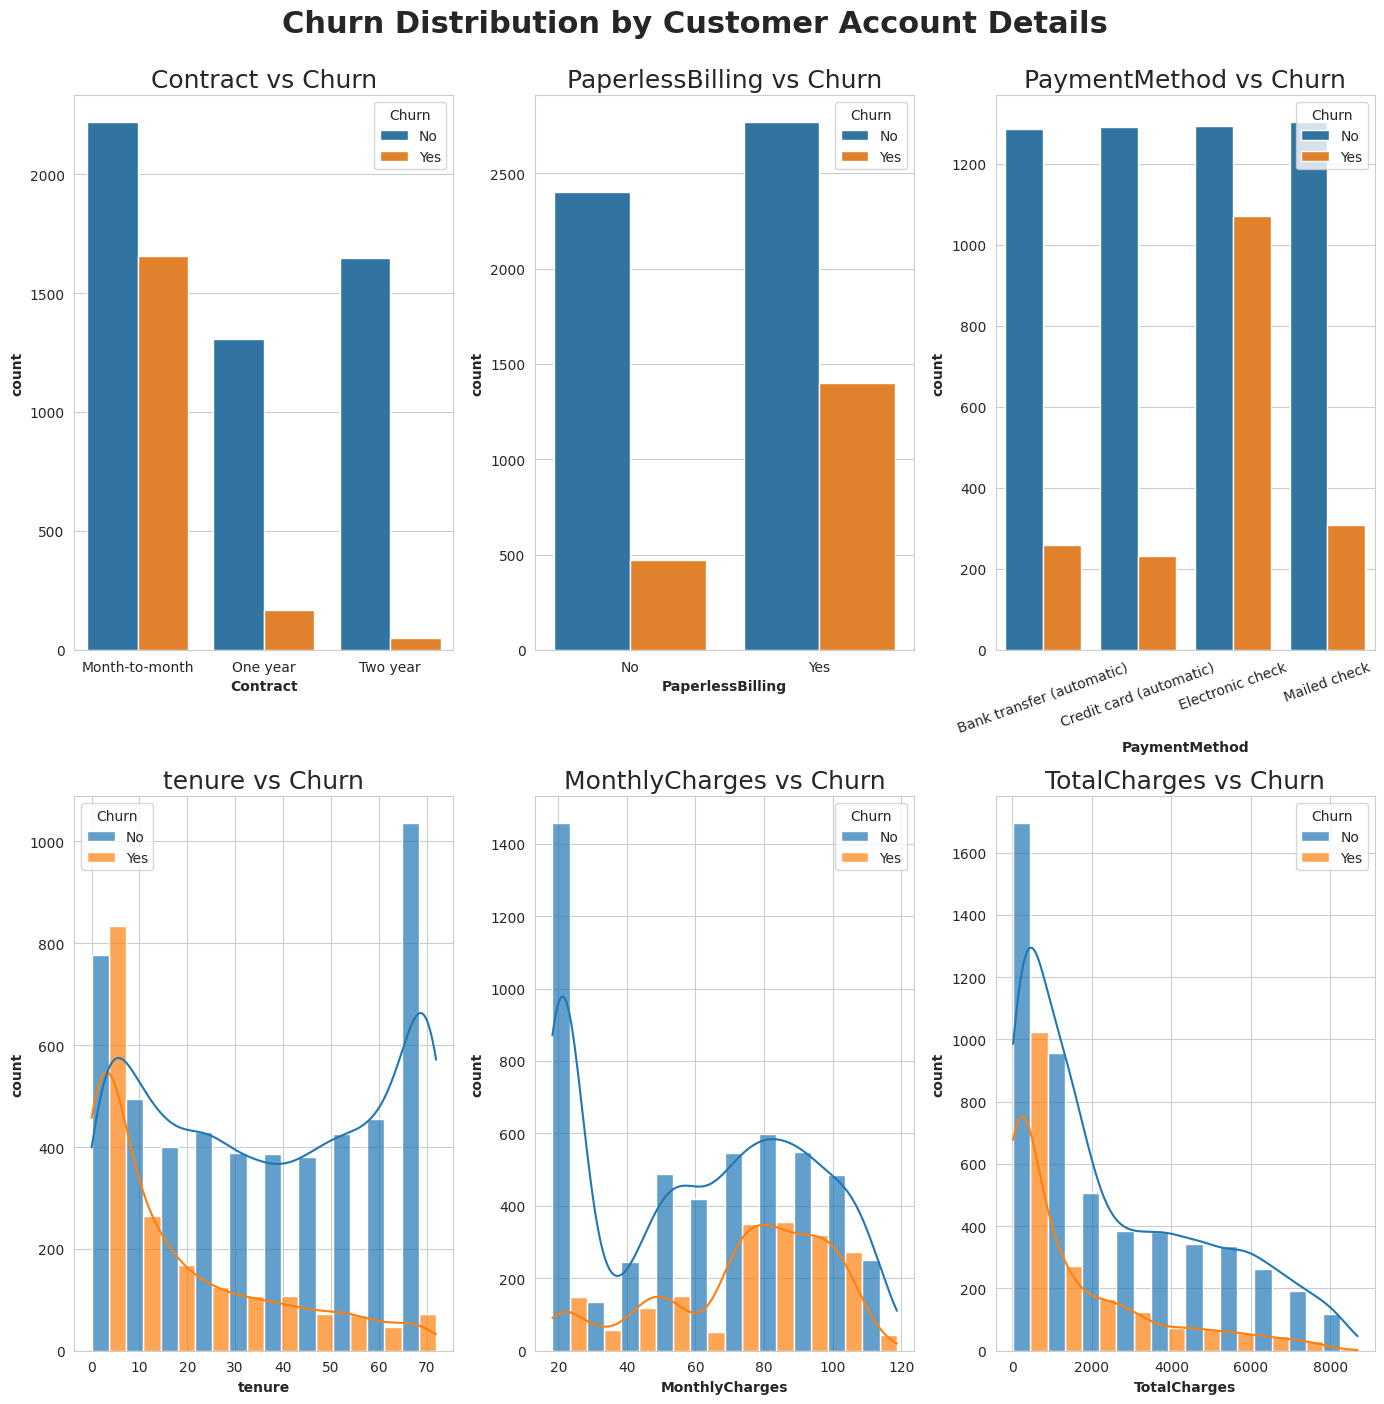

In [20]:
# Creating subplots for distribution of chrun by customer account details:

fig,axes= plt.subplots(2,3, figsize=(14,14))
axes= axes.flatten()

# plotting for non_numerical columns:
non_numerical_cols= ['Contract', 'PaperlessBilling','PaymentMethod']
for i,col in enumerate(non_numerical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f"{col} vs Churn",fontsize=18)
    if col=='PaymentMethod':
        axes[i].tick_params(axis='x',rotation=20)
    axes[i].set_xlabel(col, fontweight='bold')
    axes[i].set_ylabel("count", fontweight='bold')    

# plotting for numerical columns:
numerical_cols= ['tenure', 'MonthlyCharges', 'TotalCharges']
for i,col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Churn',ax=axes[i+3],multiple='dodge',kde=True,bins=10, alpha=0.7)
    axes[i+3].set_title(f"{col} vs Churn",fontsize=18)
    axes[i+3].set_xlabel(col, fontweight='bold')
    axes[i+3].set_ylabel("count", fontweight='bold')
    

plt.suptitle("Churn Distribution by Customer Account Details",fontsize=22, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

**Contract:**
* The majority of the customers are on month-to-month contracts and a significant portion of the them have churned. The churn rates are notably lower for those with one-year contracts and lowest for those with two-year contracts.
* This suggests that encouraging customers to opt for longer contracts through discounts or loyalty programs could effectively reduce churn.
  
**Paperless Billing:**
* Customers who opted for paperless billing have a higher churn rate than those who receive paper bills.
* This might indicate a lack of customer engagement with online billing or possible confusion with digital payment processes. Improving the digital experience and communication may help.

  
**Payment Method:**
* The churn rate is significantly higher among customers who use electronic checks compared to those who use other payment methods.
* This suggests that the payment method may be inconvenient one. Promoting automated payments might improve retention.


  
**Tenure:** 
* Churn is highest in the early months (within first 10 months) of subscription  and gradually  decrease over time.
* This suggests that initial months are critical for customer retention efforts to establish long-term customer relationships..

  
**Monthly Charges:**
* Customers paying lower monthly charges have lower churn rates, whereas those paying mid-range amounts(between $ 70 and $ 120) exhibit higher churns.
* The decline in the churn rate for higher monthly charges might be representing premium subscribers who perceive greater value in the service.
* Price optimization and targeted offers may be necessary to address concerns of mid-range paying customers.

  
**Total Charges:**
* Since the total charge is directly dependent on tenure, customers with lower total charges (short tenure) have higher churn rates and decreases with the increase in total charges( increase in tenure).
* Retainging the customers beyond early months can significantly increase their contribution to revenue, emphasizing the need for retention strategies.

### Churn by Demography:

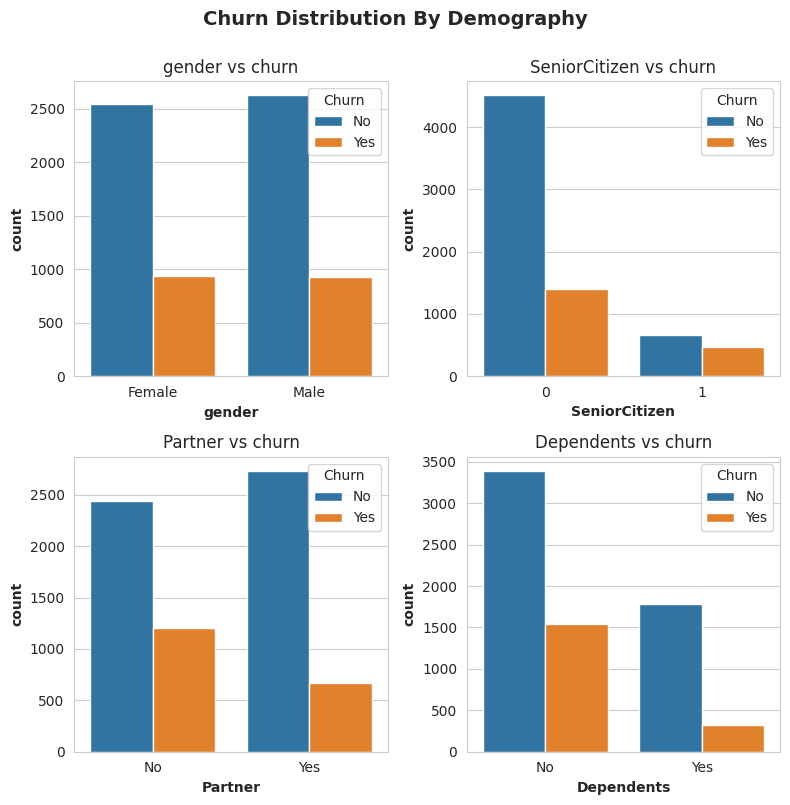

In [21]:
# Creating subplots for distribution of churn by demographic factors:

fig,axes= plt.subplots(2,2, figsize=(8,8))
axes= axes.flatten()

Demography= ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i, dem in enumerate(Demography):
    sns.countplot(data=df,x=dem, hue='Churn',ax=axes[i])
    axes[i].set_title(f"{dem} vs churn", fontsize= 12)
    axes[i].set_xlabel(dem, fontweight='bold')
    axes[i].set_ylabel("count", fontweight='bold')
    
plt.suptitle("Churn Distribution By Demography", fontsize=14, fontweight='bold', y=1)
plt.tight_layout()
plt.show()

 **Gender :** 
 * The churn rates are nearly identical for male and female customers, indicating that  gender does not play a significant role in churn.
  
 **Senior Citizen:**
 * Although senior citizens makeup a small portion of the customer base, their churn rate is notably higher compared to younger customers. This suggests the need for tailored plans and support options specially for senior citizens.
  
  **Partner and Dependants:**
  * Customers with a partner or dependents have lower churn rates compared to those without.This suggests that customers with family obligations are more likely to retain their services, possibly due to a higher perceived necessity of communication services.
  * Introducing targeted plans, such as family bundles or discounts for individual customers, could help retain those without partners or dependents.

## **Questions & Answers:**

### 1. Is there a visible pattern between tenure and monthly charges that identifies a churn risk zone?

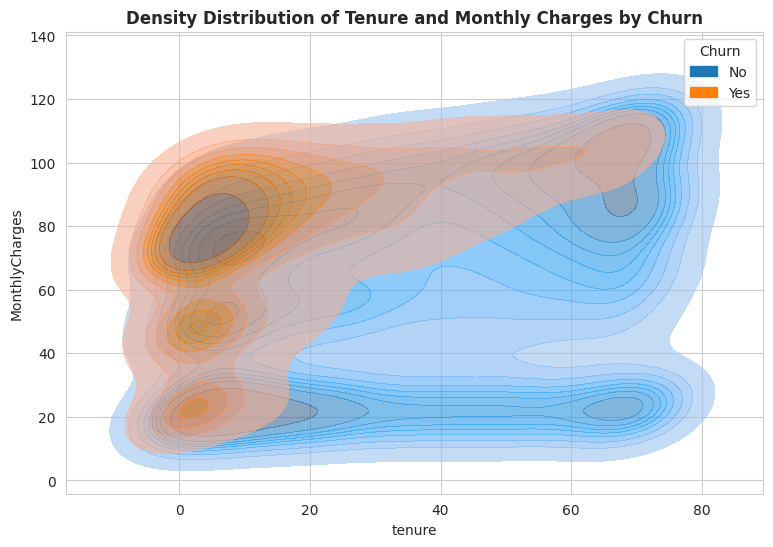

In [22]:
# Creating a kde distribution plot:

plt.figure(figsize=(9,6))

sns.kdeplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn',fill=True, alpha=.6)

plt.title('Density Distribution of Tenure and Monthly Charges by Churn',fontweight='bold')
plt.show()

* Churn is highest among **new customers** and those paying **mid-high rage monthly charges**.
* There is also noticable churn among long-term customers with higher monthly charges.
* Lower charges corresponds to fewer churns, but there is a churn risk zone in the early subscription period.
 

### 2.How does tenure vary by payment method?


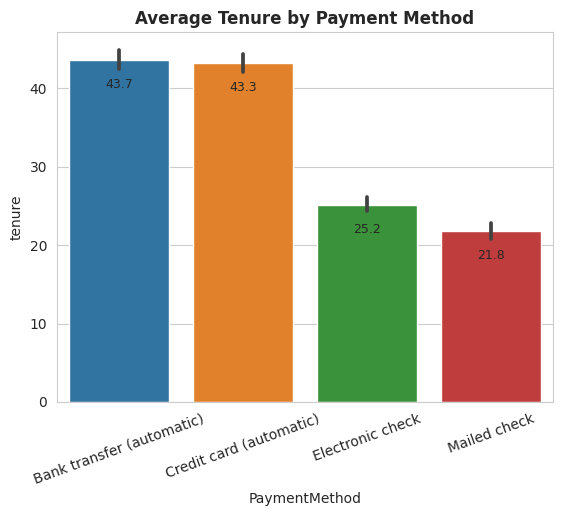

In [23]:
# Creating a barplot for tenure by payment method:

ax=sns.barplot(data=df,x='PaymentMethod',y='tenure')

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.1f}',  # Format the value
                (bar.get_x() + bar.get_width() / 2, bar.get_height()-4),  # Position
                ha='center', va='bottom', fontsize=9)

plt.title("Average Tenure by Payment Method",fontweight='bold')
plt.xticks(rotation=20)
plt.show()

* Customers using **manual payment methods** (electronic check or mailed check) have a significantly **shorter average tenure** compared to those with automated payments (bank transfer or credit card), indicating a **higher likelihood of churn among manual payment users**.
* Encouraging customers to switch to automated payment methods through incentives or discounts could help improve retention.

### 3. How is the churn rate related to number of services used ? Is there a positive or negative correlation?

In [24]:
# Calculating churn ratio for eacn number of services:

df['Total_Services'] = df.apply(lambda x: x[service_cols].isin(['Yes', 'DSL', 'Fiber optic']).sum(), axis=1)  # new column for total number of services subscribed

churn_ratio= df.groupby('Total_Services')['Churn'].value_counts().unstack()
churn_ratio['Churn_ratio']=churn_ratio['Yes']/churn_ratio['No']
churn_ratio

Churn,No,Yes,Churn_ratio
Total_Services,,,
1,1126,138,0.122558
2,593,266,0.448567
3,466,380,0.815451
4,613,352,0.574225
5,633,289,0.456556
6,676,232,0.343195
7,524,152,0.290076
8,346,49,0.141618
9,197,11,0.055838


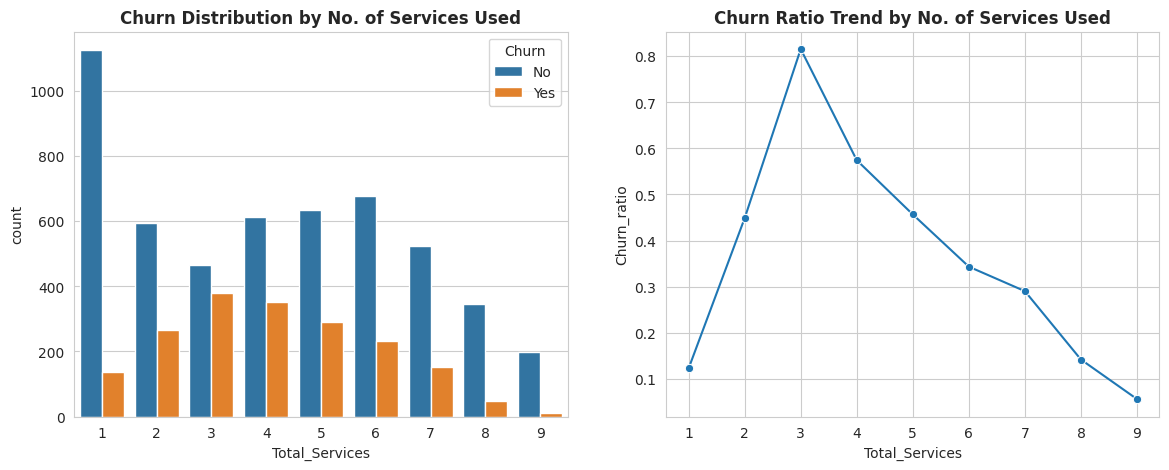

In [25]:
# Creating subplots for churn distribution and churn ratio trend by number of services:

fig,axes= plt.subplots(1,2,figsize=(14,5))

# plot 1:
sns.countplot(data=df,x='Total_Services',hue='Churn', ax=axes[0])
axes[0].set_title("Churn Distribution by No. of Services Used",fontweight='bold')

# plot 2:
sns.lineplot(data=churn_ratio, x=churn_ratio.index,y='Churn_ratio',ax=axes[1], marker='o')
axes[1].set_title("Churn Ratio Trend by No. of Services Used",fontweight='bold')

plt.show()

* **Churn rate is highest** for customers with **3 services** while it is lower for both higher and lower number of services. Customers with the lowest and highest number of services seems the most satisfied.

*  Customers with 3 services typically have internet alone or with very few add-ons, which might not provide enough value, leading to dissatisfaction and churn. **Adding more services tends to reduce churn**.

*  Most customers with fewer than 3 services might be using only phone service, which can be the reason for lower churn among them. 
  

### 4. Why do customers using Fiber Optic Internet Service experience a significantly higher churn rate compared to those using DSL? What factors might contribute to this trend?[](http://)

The reason for the significantly higher churn rate among the fiber optic users compared to DSL users has to be explored in various aspects:

1. The **monthly charges** paid by them has to be compared as high charges can lead to churn.

2. The **contract type** has to be compared as churn rate is significantly high for month-to-month contract compared to other contract types.
  
3. The **payment mode** used by them also has to be checked ( as churn rate is higher among those who use electronic check payment method).

**1. Comparison by Monthly Charges:**

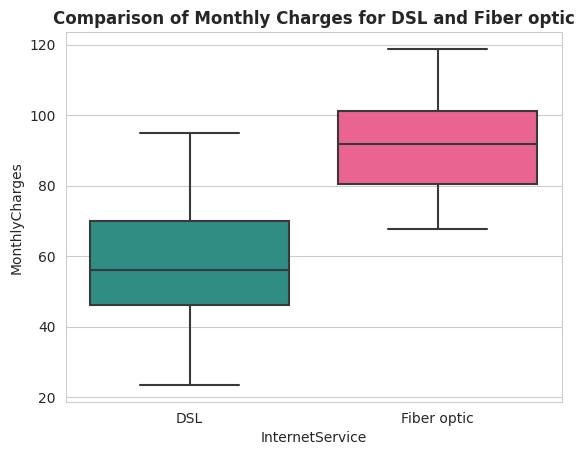

In [26]:
InternetUsers= df[df['InternetService'] != 'No'].copy()   # filtering out data of internet users
InternetUsers['InternetService']=InternetUsers['InternetService'].astype('object')   # converting from category to object data type for better visualization


# Creating a boxplot for monthly charges by internet service type:

sns.boxplot(data=InternetUsers, x='InternetService', y='MonthlyCharges', palette={'Fiber optic': '#FF4E88', 'DSL': '#219C90'})

plt.title("Comparison of Monthly Charges for DSL and Fiber optic",fontweight='bold')
plt.show()

Fiber optic users pay a significantly higher monthly charge compared to DSL users. The higher pricing must be a key driving factor for customer dissatisfaction and increased churn.

**2. Comparison by Contract type:**

In [27]:
InternetUsers.groupby('InternetService')['Contract'].value_counts().reset_index().pivot(index="InternetService",columns="Contract",values='count')

Contract,Month-to-month,One year,Two year
InternetService,,,
DSL,1223,570,628
Fiber optic,2128,539,429


 A large proportion of fiber optic users are on month-to-month contracts, which have a much higher churn rate compared to long-term contracts.

**3. Comparison by Payment Method:**

In [28]:
InternetUsers.groupby('InternetService')['PaymentMethod'].value_counts().reset_index().pivot(index='InternetService',columns='PaymentMethod',values='count')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
InternetService,,,,
DSL,566,594,648,613
Fiber optic,646,597,1595,258


A significantly higher number of fiber optic users pay via electronic check, which has been linked to higher churn rates.

The above result indicate that the higher churn rate among Fiber Optic users is primarily driven by a combination of **higher pricing**, a **larger proportion of customers on month-to-month contracts**, and **a greater number of users relying on electronic check payments**, all of which are strongly associated with increased churn.



### **CONCLUSION:**

This analysis provided valuable insights into customer churn in the telecom company. The highest churn rates were observed among customers with **month-to-month contracts, electronic check payments,** and **fiber optic internet services**. Customers not subscribed to additional services like online security, backup, or streaming also exhibited higher churn, highlighting the role of service engagement in retention. The higher churn among customers with higher monthly charges reflects cost sensitivity, while those on paperless billing may require a better digital experience.Additionally, churn decreased as tenure increased, emphasizing the importance of retention efforts during the initial months. Demographic factors like gender had minimal impact, but senior citizens and customers without dependents showed higher churn, suggesting the need for tailored plans and support.

Churn was significantly higher among new customers, especially those with mid-to-high monthly charges, emphasizing the need for engagement and retention strategies during the early months. Automated payment users had longer tenures, reinforcing the benefits of encouraging seamless payment methods. Customers with exactly three services showed the highest churn, which decreased as the number of services increased, suggesting dissatisfaction with limited service combinations. Additionally, fiber optic users had elevated churn, largely driven by higher pricing, short-term contracts and payment preferance.

To mitigate churn, the company could focus on **offering incentives for long-term contracts, optimizing pricing for high-range paying customers, and encouraging automated payments. Enhancing customer engagement during the early months, promoting bundled service plans, and tailoring plans for different customer segments** can also contribute to improved retention and long-term customer satisfaction.